In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


# COVID-19 World Vaccination Progress/country_vaccinations.csv

In [2]:
data = pd.read_csv("datasets/COVID-19 World Vaccination Progress/country_vaccinations.csv")
usa_values=data.loc[data['iso_code']=='USA']
usa_values=usa_values.fillna(method="ffill")
# usa_values=usa_values.fillna(method="bfill")
usa_values=usa_values.fillna(0)
usa_values=usa_values.drop(columns=['vaccines', 'source_name','source_website'])

# printing nan
print(usa_values.isna().sum())


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
dtype: int64


## Box plot to detect outliers

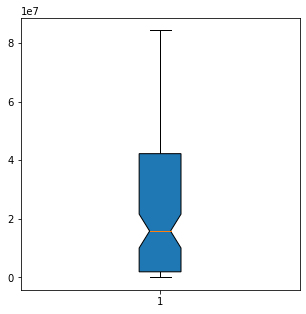

In [3]:
# No outliers in people fully vaccinated
plt.figure(figsize=(5, 5))
plt.boxplot(usa_values['people_fully_vaccinated'], notch=True, patch_artist=True)
plt.show()

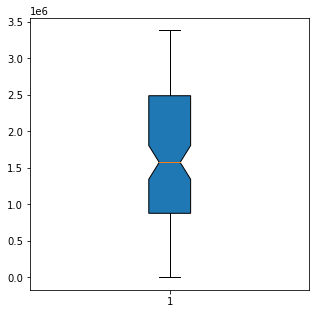

In [4]:
# No outliers in daily vaccinations
plt.figure(figsize=(5, 5))
plt.boxplot(usa_values['daily_vaccinations'], notch=True, patch_artist=True)
plt.show()

In [5]:
usa_values.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
12061,United States,USA,2020-12-20,556208.0,556208.0,0.0,0.0,0.0,0.17,0.17,0.0,0.0
12062,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,57909.0,0.18,0.18,0.0,173.0
12063,United States,USA,2020-12-22,614117.0,614117.0,0.0,57909.0,127432.0,0.18,0.18,0.0,381.0
12064,United States,USA,2020-12-23,1008025.0,1008025.0,0.0,57909.0,150606.0,0.30,0.30,0.0,450.0
12065,United States,USA,2020-12-24,1008025.0,1008025.0,0.0,57909.0,191001.0,0.30,0.30,0.0,571.0


In [6]:
usa_values=usa_values[['date','total_vaccinations','people_vaccinated','people_fully_vaccinated']]
usa_values.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
12061,2020-12-20,556208.0,556208.0,0.0
12062,2020-12-21,614117.0,614117.0,0.0
12063,2020-12-22,614117.0,614117.0,0.0
12064,2020-12-23,1008025.0,1008025.0,0.0
12065,2020-12-24,1008025.0,1008025.0,0.0


In [7]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations.csv', "w")
usa_values.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [8]:
usa_values['date'] = pd.to_datetime(usa_values.date)

groupedByMonth=usa_values.groupby(pd.Grouper(key='date', freq='1M')).max().reset_index()
groupedByMonth


,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-31,2794588.0,2794588.0,0.0
1,2021-01-31,31123299.0,25201143.0,5657142.0
2,2021-02-28,75236003.0,49772180.0,24779920.0
3,2021-03-31,150273292.0,97593290.0,54607041.0
4,2021-04-30,209406814.0,131247546.0,84263408.0


In [9]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations_grouped_by_month.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [10]:
data = usa_values['total_vaccinations']
normalized_arr = preprocessing.normalize([data])
usa_values['total_vaccinations']=normalized_arr[0]
data = usa_values['people_vaccinated']
normalized_arr = preprocessing.normalize([data])
usa_values['people_vaccinated']=normalized_arr[0]
data = usa_values['people_fully_vaccinated']
normalized_arr = preprocessing.normalize([data])
usa_values['people_fully_vaccinated']=normalized_arr[0]

In [11]:
usa_values.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
12061,2020-12-20,0.000533,0.000818,0.0
12062,2020-12-21,0.000588,0.000904,0.0
12063,2020-12-22,0.000588,0.000904,0.0
12064,2020-12-23,0.000966,0.001483,0.0
12065,2020-12-24,0.000966,0.001483,0.0


In [12]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations_normalized.csv', "w")
usa_values.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [13]:
usa_values['date'] = pd.to_datetime(usa_values.date)

groupedByMonth=usa_values.groupby(pd.Grouper(key='date', freq='1M')).max().reset_index()
groupedByMonth.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-31,0.002677,0.004112,0.000000
1,2021-01-31,0.029811,0.037080,0.014819
2,2021-02-28,0.072063,0.073232,0.064913
3,2021-03-31,0.143936,0.143594,0.143047
4,2021-04-30,0.200575,0.193111,0.220734


In [14]:
import os
if not os.path.exists('cleaned/COVID-19 World Vaccination Progress'):
    os.makedirs('cleaned/COVID-19 World Vaccination Progress')
f=open(f'cleaned/COVID-19 World Vaccination Progress/country_vaccinations_normalized_grouped_by_month.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

# us-daily-vaccines.csv

In [15]:
us_daily_vaccines=pd.read_csv("datasets/us-daily-vaccines.csv")


states_to_exclude=["American Samoa","Bureau of Prisons","Dept of Defense","District of Columbia","Federated States of Micronesia","Guam","Indian Health Svc","Long Term Care","Marshall Islands","Northern Mariana Islands","Puerto Rico","Republic of Palau","Veterans Health","United States","Virgin Islands"]

us_daily_vaccines=us_daily_vaccines.drop(columns=['Code'])

count =0
for s in states_to_exclude:
    us_daily_vaccines=us_daily_vaccines[us_daily_vaccines['Entity']!=states_to_exclude[count]]
    count+=1

# printing nan
print(us_daily_vaccines.isna().sum())
us_daily_vaccines.describe()


Entity                0
Day                   0
daily_vaccinations    0
dtype: int64


,daily_vaccinations
count,5050.000000
mean,40493.919010
std,53026.532755
min,0.000000
25%,10468.250000
50%,23898.500000
75%,48924.000000
max,494575.000000


In [16]:
us_daily_vaccines.head()

,Entity,Day,daily_vaccinations
0,Alabama,2021-01-13,5906
1,Alabama,2021-01-14,7083
2,Alabama,2021-01-15,7478
3,Alabama,2021-01-16,7498
4,Alabama,2021-01-17,7509


In [17]:
days=set(us_daily_vaccines["Day"])
temp={"Day":[],"daily_vaccinations":[]}
for d in days:
    temp["Day"].append(d)
    sum=us_daily_vaccines[us_daily_vaccines["Day"]==d]["daily_vaccinations"].sum()
    temp["daily_vaccinations"].append(sum)
us_daily_vaccines=pd.DataFrame(temp)



## Boxplot to detect outliers. 

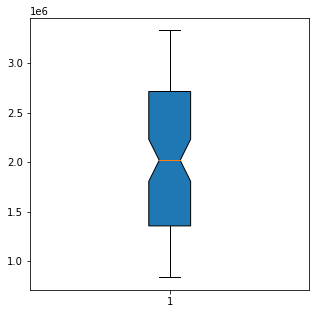

In [18]:
plt.figure(figsize=(5, 5))
plt.boxplot(us_daily_vaccines['daily_vaccinations'], notch=True, patch_artist=True)
plt.show()


### Hide outliers

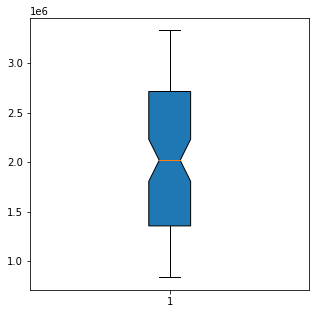

In [19]:
plt.figure(figsize=(5, 5))
plt.boxplot(us_daily_vaccines['daily_vaccinations'], notch=True, patch_artist=True, showfliers=False)
plt.show()

## IQR range to find statistical dispersion.

In [20]:
from scipy.stats import iqr

data = us_daily_vaccines['daily_vaccinations']
iqr(data, axis=0)


1359464.0

In [21]:
'''
Warning!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
every time you run this block it will remove outliers assumed to be in Q3
'''
print(us_daily_vaccines.shape)
#find Q1, Q3, and interquartile range for each column
Q1 =  us_daily_vaccines["daily_vaccinations"].quantile(q=.25)
Q3 =  us_daily_vaccines["daily_vaccinations"].quantile(q=.75)
IQR = us_daily_vaccines["daily_vaccinations"].apply(iqr)
print(Q1)
print(Q3)
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
us_daily_vaccines = us_daily_vaccines[~((us_daily_vaccines["daily_vaccinations"] > (Q3+1.5*IQR)))]

print(us_daily_vaccines.shape)


(101, 2)
1354719.0
2714183.0
(76, 2)


## Boxplot graph without outliers

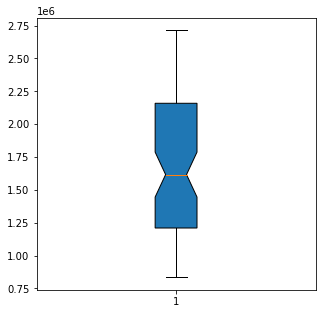

In [22]:
plt.figure(figsize=(5, 5))
plt.boxplot(us_daily_vaccines['daily_vaccinations'], notch=True, patch_artist=True)
plt.show()

## group by month whole USA (discretize data)

In [23]:
us_daily_vaccines['Day'] = pd.to_datetime(us_daily_vaccines.Day)

groupedByMonth=us_daily_vaccines.groupby(pd.Grouper(key='Day', freq='1M')).sum().reset_index()
groupedByMonth.head()

,Day,daily_vaccinations
0,2021-01-31,18665480
1,2021-02-28,43038036
2,2021-03-31,66948906


In [24]:
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines-discretize-not-normalized.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()


In [25]:
data = groupedByMonth['daily_vaccinations']
normalized_arr = preprocessing.normalize([data])
groupedByMonth['daily_vaccinations'] = normalized_arr[0]


In [26]:
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines-discretize-normalized.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

## Graph normal distribution of the dataset

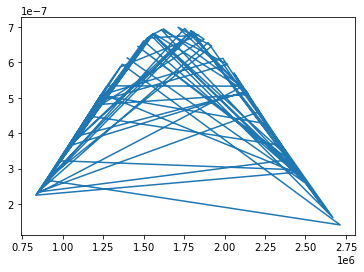

In [27]:
from scipy.stats import norm
import statistics

data = us_daily_vaccines['daily_vaccinations']
mean = statistics.mean(data)
sd = statistics.stdev(data)
# norm.pdf(data, mean, sd)
# plt.plot(norm.pdf(data, mean, sd))
# plt.show()
plt.plot(data, norm.pdf(data, mean, sd))
# plt.show()

## Preprocess and normalize the data

[[0.08986206 0.16025117 0.10001154 0.05791397 0.17440574 0.08788024
  0.06694866 0.11529672 0.05830735 0.07950367 0.0777454  0.12969219
  0.1034085  0.15816108 0.100003   0.09832152 0.05680405 0.09772958
  0.11819671 0.08705042 0.08181083 0.13583293 0.0539385  0.10042086
  0.13731232 0.06915358 0.08152732 0.05463788 0.1219528  0.16941013
  0.15784712 0.07975434 0.07697939 0.13797835 0.11264161 0.05511936
  0.06310858 0.15678874 0.15849374 0.11537794 0.1203544  0.07534533
  0.10010652 0.15295882 0.12780457 0.07937709 0.14525573 0.17153358
  0.09926372 0.10431196 0.13665195 0.15901641 0.09636411 0.06712735
  0.05354493 0.15742276 0.13223408 0.15754858 0.16614593 0.14100711
  0.14227529 0.05450159 0.15416942 0.09404758 0.15532676 0.11507645
  0.15051621 0.07425585 0.05848926 0.12340283 0.11000187 0.13720758
  0.06690168 0.11624529 0.05579342 0.07767581]]


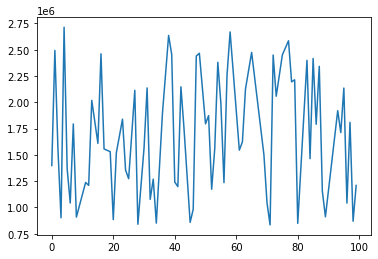

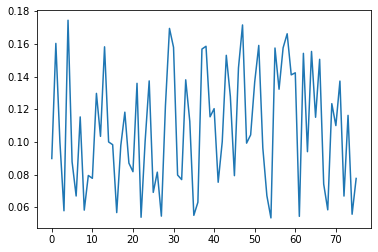

In [28]:
data = us_daily_vaccines['daily_vaccinations']
normalized_arr = preprocessing.normalize([data])
print(normalized_arr)

plt.plot( us_daily_vaccines['daily_vaccinations'])
plt.show()
plt.plot(normalized_arr[0])
plt.show()

In [29]:
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines.csv', "w")
us_daily_vaccines.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

In [30]:
us_daily_vaccines['daily_vaccinations'] = normalized_arr[0]
import os
if not os.path.exists('cleaned'):
    os.makedirs('cleaned')
f=open(f'cleaned/us-daily-vaccines-normalized.csv', "w")
us_daily_vaccines.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

# Novel Corona Virus 2019 Dataset/covid_19_data.csv


In [31]:
data = pd.read_csv("datasets/Novel Corona Virus 2019 Dataset/covid_19_data.csv")
data=data[data["Country/Region"]=="US"]
display(data)



# printing nan
print(data.isna().sum())



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,71,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
119,120,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
120,121,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
161,162,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285273,285274,05/02/2021,Virginia,US,2021-05-03 04:20:39,661314.0,10791.0,0.0
285283,285284,05/02/2021,Washington,US,2021-05-03 04:20:39,404709.0,5499.0,0.0
285286,285287,05/02/2021,West Virginia,US,2021-05-03 04:20:39,153918.0,2686.0,0.0
285288,285289,05/02/2021,Wisconsin,US,2021-05-03 04:20:39,661685.0,7567.0,0.0


SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


combine the values of all the states for every day

In [32]:
from datetime import datetime

dates=list(data['ObservationDate'].unique())
dates.sort(key=lambda date: datetime.strptime(date, "%m/%d/%Y"))

cleaned = pd.DataFrame({'ObservationDate':[],'Confirmed':[],'Deaths':[],'Recovered':[]})
for d in dates:
    temp=data[data["ObservationDate"]==d]
    d=datetime.strptime(d, "%m/%d/%Y")
    d=d.strftime('%Y-%m-%d')
    cleaned.loc[len(cleaned.index)] = [d, temp['Confirmed'].sum(),temp['Deaths'].sum(),temp['Recovered'].sum()] 


## Boxplots to detect outliers. 

<Figure size 720x720 with 0 Axes>

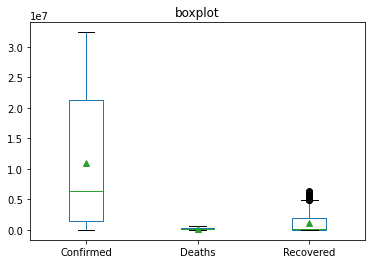

In [33]:
plt.figure(figsize=(10, 10))
ax = cleaned[['Confirmed', 'Deaths', 'Recovered']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

In [34]:
# '''
# Warning!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# every time you run this block it will remove outliers assumed to be in Q3
# '''
# print(cleaned.shape)
# #find Q1, Q3, and interquartile range for each column
# Q1 =  cleaned["Confirmed"].quantile(q=.25)
# Q3 =  cleaned["Confirmed"].quantile(q=.75)
# IQR = cleaned["Confirmed"].apply(iqr)
# print(Q1)
# print(Q3)
# #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
# cleaned = cleaned[~((cleaned["Confirmed"] > (Q3+1.5*IQR)))]

# print(cleaned.shape)


## Boxplot graph without outliers

<Figure size 720x720 with 0 Axes>

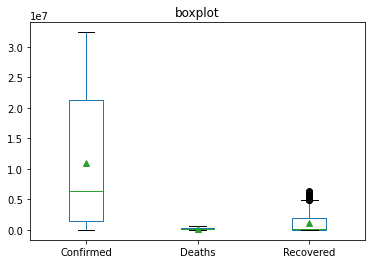

In [35]:
plt.figure(figsize=(10, 10))
ax = cleaned[['Confirmed', 'Deaths', 'Recovered']].plot(kind='box', title='boxplot', showmeans=True)
plt.show()

In [36]:
import os
if not os.path.exists('cleaned/Novel Corona Virus 2019 Dataset'):
    os.makedirs('cleaned/Novel Corona Virus 2019 Dataset')
f=open(f'cleaned/Novel Corona Virus 2019 Dataset/covid_19_data.csv', "w")
cleaned.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

## group by month (discretize data)

In [37]:
cleaned['ObservationDate'] = pd.to_datetime(cleaned.ObservationDate)

groupedByMonth=cleaned.groupby(pd.Grouper(key='ObservationDate', freq='1M')).max().reset_index()



In [38]:
import os
if not os.path.exists('cleaned/Novel Corona Virus 2019 Dataset'):
    os.makedirs('cleaned/Novel Corona Virus 2019 Dataset')
f=open(f'cleaned/Novel Corona Virus 2019 Dataset/covid_19_data_grouped_by_month.csv', "w")
groupedByMonth.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

## normalize

In [39]:
cleaned["Confirmed"] = (preprocessing.normalize([cleaned["Confirmed"]]))[0]
print(cleaned["Confirmed"])
cleaned["Deaths"] = preprocessing.normalize([cleaned["Deaths"]])[0]
print(cleaned["Deaths"])
cleaned["Recovered"] = preprocessing.normalize([cleaned["Recovered"]])[0]
print(cleaned["Recovered"])

0      2.940369e-09
1      2.940369e-09
2      5.880739e-09
3      5.880739e-09
4      1.470185e-08
           ...     
462    9.477060e-02
463    9.494173e-02
464    9.511204e-02
465    9.524525e-02
466    9.533128e-02
Name: Confirmed, Length: 467, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
462    0.090126
463    0.090260
464    0.090423
465    0.090500
466    0.090551
Name: Deaths, Length: 467, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
462    0.0
463    0.0
464    0.0
465    0.0
466    0.0
Name: Recovered, Length: 467, dtype: float64


In [40]:
import os
if not os.path.exists('cleaned/Novel Corona Virus 2019 Dataset'):
    os.makedirs('cleaned/Novel Corona Virus 2019 Dataset')
f=open(f'cleaned/Novel Corona Virus 2019 Dataset/covid_19_data_normalized.csv', "w")
cleaned.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()

# Countries population by year 2020


In [41]:
data = pd.read_csv("datasets/Countries population by year 2020/population_by_country_2020.csv")
data=data[data["Country (or dependency)"]=="United States"]
data=data[["Country (or dependency)","Population (2020)","Density (P/Km²)","Med. Age"]]
data.head()


,Country (or dependency),Population (2020),Density (P/Km²),Med. Age
2,United States,330610570,36,38


In [42]:
import os
if not os.path.exists('cleaned/Countries population by year 2020'):
    os.makedirs('cleaned/Countries population by year 2020')
f=open(f'cleaned/Countries population by year 2020/population_by_country_2020.csv', "w")
data.to_csv(path_or_buf=f,index=False,line_terminator='\n')
f.close()